In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("dataset/originais/dataset_sudeste_simples_realista_outliers-2k.csv")

In [4]:
df.head()

,id,idade,renda,cidade,categoria,nota,feedback
0,1,39.0,5112.57,Belo Horizonte,A,4.5,Bom
1,2,64.0,9510.34,Belo Horizonte,B,5.4,Ruim
2,3,61.0,8970.80,São Paulo,B,5.0,Ruim
3,4,61.0,8526.52,Rio de Janeiro,A,1.8,Bom
4,5,53.0,3531.76,Vitória,B,5.5,Bom


In [5]:
print(df.tail(10))

        id  idade     renda          cidade categoria  nota feedback
1990  1991   42.0  11619.13       São Paulo         B   8.2     Ruim
1991  1992   36.0  12318.31  Belo Horizonte         B   5.6  Regular
1992  1993   59.0   6357.74  Belo Horizonte         B   8.0      Bom
1993  1994   33.0   5594.33       São Paulo         B   4.4      Bom
1994  1995   52.0   8335.10  Belo Horizonte         B   9.5      Bom
1995  1996   66.0   7223.47  Belo Horizonte         B   3.8     Ruim
1996  1997   52.0  11712.34  Rio de Janeiro         A   8.4  Regular
1997  1998   48.0   7679.22         Vitória         A   0.1  Regular
1998  1999   27.0   3062.80         Vitória         B   2.1      Bom
1999  2000   21.0  12849.76       São Paulo         B   6.3  Regular


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         2000 non-null   int64  
 1   idade      1982 non-null   float64
 2   renda      1983 non-null   float64
 3   cidade     1988 non-null   object 
 4   categoria  1979 non-null   object 
 5   nota       1970 non-null   float64
 6   feedback   1975 non-null   object 
dtypes: float64(3), int64(1), object(3)
memory usage: 109.5+ KB


In [7]:
df.describe()

,id,idade,renda,nota
count,2000.000000,1982.000000,1983.000000,1970.000000
mean,1000.500000,43.570131,7204.110968,4.965228
std,577.494589,16.166064,3573.795505,2.940147
min,1.000000,1.000000,422.990000,-3.700000
25%,500.750000,30.000000,4189.235000,2.500000
50%,1000.500000,44.000000,7079.250000,5.000000
75%,1500.250000,57.000000,10111.805000,7.300000
max,2000.000000,118.000000,33739.810000,14.600000


In [8]:
print(df.isnull().sum())

id            0
idade        18
renda        17
cidade       12
categoria    21
nota         30
feedback     25
dtype: int64


In [10]:
#utlizando métodos pandas para achar as medidas estatísticas
mediana_idade = df['idade'].median()
mediana_nota = df['nota'].median()
mediana_renda = df['renda'].median()
media_renda = df['renda'].mean()


print(f'Mediana das idades {mediana_idade}')
print(f'Mediana das Notas {mediana_nota}')
print(f'Mediana das rendas {mediana_renda}')
print(f'valor medio das rendas {media_renda:.4f}')

Mediana das idades 44.0
Mediana das Notas 5.0
Mediana das rendas 7079.25
valor medio das rendas 7204.1110


In [11]:
#Calculo IQRe outliers para renda, idade e nota

Q1_renda = df['renda'].quantile(0.25)
Q3_renda = df['renda'].quantile(0.75)
IQR_renda = Q3_renda - Q1_renda
limite_inferior_renda = Q1_renda - 1.5 * IQR_renda
limite_superior_renda = Q3_renda + 1.5 * IQR_renda

outliers_renda=df[(df['renda'] < limite_inferior_renda) | (df['renda'] > limite_superior_renda)]

#---------------------------------------------------------

Q1_idade = df['idade'].quantile(0.25)
Q3_idade = df['idade'].quantile(0.75)
IQR_idade = Q3_idade - Q1_idade
limite_inferior_idade = Q1_idade - 1.5 * IQR_idade
limite_superior_idade = Q3_idade + 1.5 * IQR_idade

outliers_idade=df[(df['idade'] < limite_inferior_idade) | (df['idade'] > limite_superior_idade)]

#---------------------------------------------------------
Q1_nota = df['nota'].quantile(0.25)
Q3_nota = df['nota'].quantile(0.75)
IQR_nota = Q3_nota - Q1_nota
limite_inferior_nota = Q1_nota - 1.5 * IQR_nota
limite_superior_nota = Q3_nota + 1.5 * IQR_nota

outliers_nota=df[(df['nota'] < limite_inferior_nota) | (df['nota'] > limite_superior_nota)]

print(f'\n\n\t Calculo de IQR e Outliers \n\n')
print(f'\n\t IQR - Campo Renda \n')
print(f'IQR ----------- {IQR_renda:.2f}')
print(f'Quartis -- Q1:  {Q1_renda:-8.2f}   -> Q3: {Q3_renda:-8.2f}')
print(f'Limites -- Inf: {limite_inferior_renda:-5.2f}  -> Sup: {limite_superior_renda:-8.2f}')
print(f'\nPossíveis outliers em "renda":\n{outliers_renda}\n')


print(f'\n\t IQR - Campo Idade \n')
print(f'IQR ----------- {IQR_idade:.2f}')
print(f'Quartis -- Q1: {Q1_idade:-6.2f}   -> Q3: {Q3_idade:-8.2f}')
print(f'Limites -- Inf: {limite_inferior_idade:-5.2f}  -> Sup: {limite_superior_idade:-7.2f}')
print(f'\nPossíveis outliers em "idade":\n{outliers_idade}\n')


print(f'\n\t IQR - Campo Nota \n')
print(f'IQR ----------- {IQR_nota:.2f}')
print(f'Quartis -- Q1: {Q1_nota:-5.2f}   -> Q3: {Q3_nota:-8.2f}')
print(f'Limites -- Inf: {limite_inferior_nota:-5.2f}  -> Sup: {limite_superior_nota:-7.2f}')
print(f'\nPossíveis outliers em "nota": \n{outliers_nota}\n')



	 Calculo de IQR e Outliers 



	 IQR - Campo Renda 

IQR ----------- 5922.57
Quartis -- Q1:   4189.24   -> Q3: 10111.81
Limites -- Inf: -4694.62  -> Sup: 18995.66

Possíveis outliers em "renda":
        id  idade     renda          cidade categoria  nota feedback
57      58    8.0  28177.31         Vitória         A  11.2     Ruim
220    221   92.0  26515.56  Belo Horizonte         A  14.0      Bom
253    254    5.0  29917.66  Belo Horizonte         B  10.3      Bom
834    835   82.0  30299.54  Belo Horizonte         A  -3.7      Bom
881    882    1.0  24462.58  Belo Horizonte         A  13.4      Bom
1441  1442  106.0  33739.81       São Paulo         A  -1.4  Regular


	 IQR - Campo Idade 

IQR ----------- 27.00
Quartis -- Q1:  30.00   -> Q3:    57.00
Limites -- Inf: -10.50  -> Sup:   97.50

Possíveis outliers em "idade":
        id  idade     renda          cidade categoria  nota feedback
850    851  101.0   1050.45         Vitória         B  10.1     Ruim
1052  1053  118.0   103

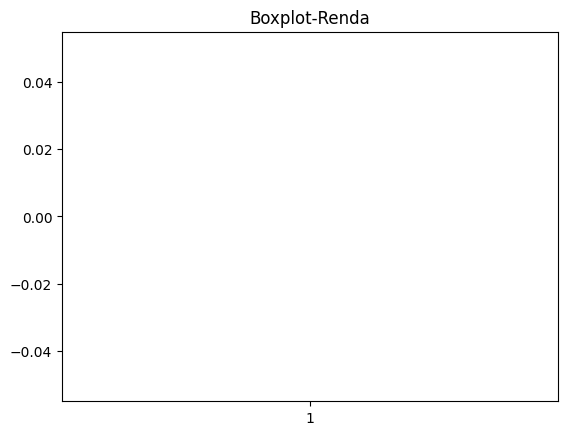

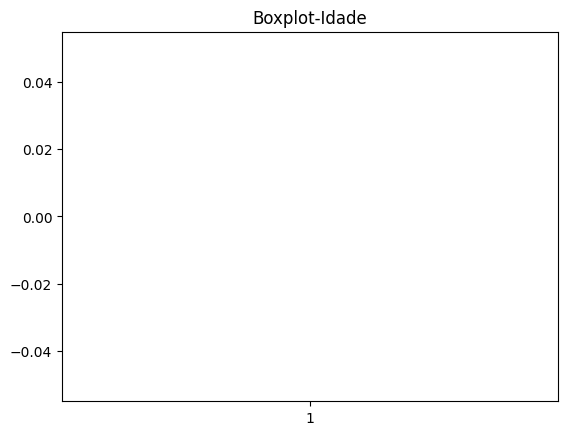

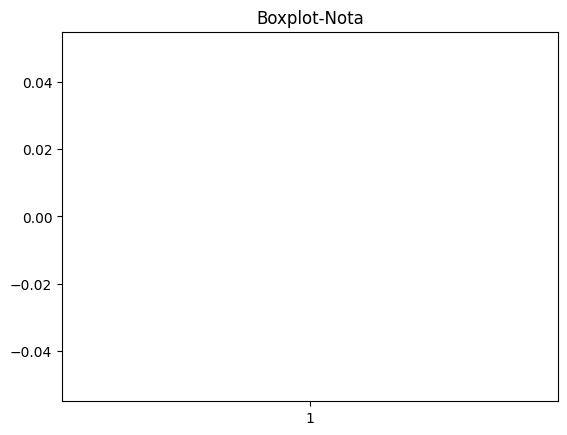

In [12]:

#grafico renda
plt.boxplot(df['renda'])
plt.title('Boxplot-Renda')
plt.show()   

#grafico idade
plt.boxplot(df['idade'])
plt.title('Boxplot-Idade')
plt.show()    

#grafico nota
plt.boxplot(df['nota'])
plt.title('Boxplot-Nota')
plt.show() 

In [13]:
imputer_media = SimpleImputer(strategy='mean')

NameError: name 'SimpleImputer' is not defined

In [14]:
df[['idade', 'nota']] = imputer_media.fit_transform(df[['idade', 'nota']])
imputer_mediana = SimpleImputer(strategy='mean')
df[['renda']] = imputer_media.fit_transform(df[['renda']])

NameError: name 'imputer_media' is not defined